In [66]:
import pandas as pd

# Load the CSV with encoding fixed
df = pd.read_csv("Downloads/archive/AviationData.csv", encoding='latin1')

# Show the first few rows
df.head()

C:\Users\AngelaC\AppData\Local\Temp\ipykernel_31652\4268235836.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Downloads/archive/AviationData.csv", encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [33]:
# Load US State Codes
states = pd.read_csv("Downloads/archive/USState_Codes.csv", encoding='latin1')

# Preview the state codes data
states.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [34]:
# Check shape (rows, columns)
print("Shape:", df.shape)

# Check all columns
print("\nColumn Names:")
print(df.columns)

# Check for null values
print("\nMissing Values per Column:")
print(df.isna().sum())

# Check datatypes
print("\nData Types:")
print(df.dtypes)

Shape: (88889, 31)

Column Names:
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Missing Values per Column:
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name          

In [35]:
# Show percentage of missing values
missing_percent = df.isna().sum() / len(df) * 100
missing_percent.sort_values(ascending=False)

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

In [36]:
# Drop columns with too much missing data
df_cleaned = df.drop(columns=[
    'Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category',
    'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name'
])

# Preview cleaned data
df_cleaned.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [37]:
# Convert Event.Date to datetime format
df_cleaned['Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'], errors='coerce')

# Create a new column for the year
df_cleaned['Event_Year'] = df_cleaned['Event.Date'].dt.year

# Check the first few rows
df_cleaned[['Event.Date', 'Event_Year']].head()

,Event.Date,Event_Year
0,1948-10-24,1948
1,1962-07-19,1962
2,1974-08-30,1974
3,1977-06-19,1977
4,1979-08-02,1979


In [38]:
# Group accidents by year
accidents_per_year = df_cleaned['Event_Year'].value_counts().sort_index()

# Preview the counts
accidents_per_year.head()

Event_Year
1948    1
1962    1
1974    1
1977    1
1979    2
Name: count, dtype: int64

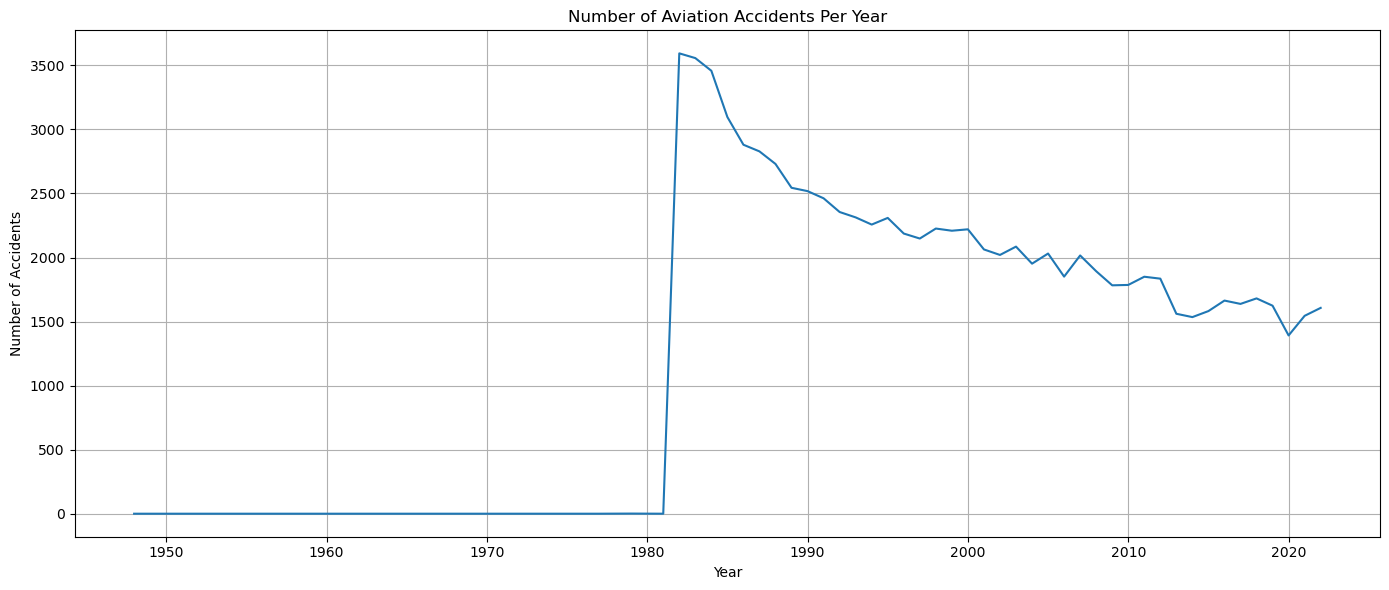

In [39]:
# Import the required plotting library
import matplotlib.pyplot as plt

# Plot accidents per year
accidents_per_year.plot(kind='line', figsize=(14, 6))
plt.title('Number of Aviation Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# Line chart showing the trend of accidents over the years

This line chart shows the number of aviation accidents recorded each year from the dataset. 
The data appears to stop at 2020 due to missing or incomplete entries in the 'Event Date' column for later years. 
These rows were removed during data cleaning to ensure accuracy in the analysis Therefore, this chart reflects the available clean data, not the full timeline up to 2023.

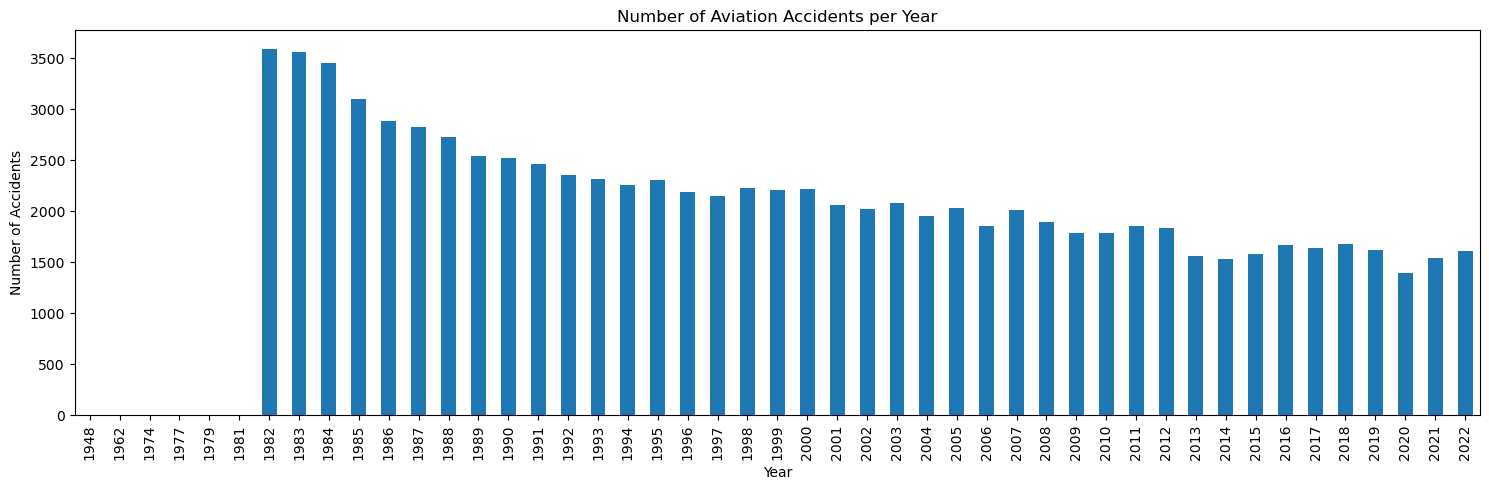

In [40]:
accidents_per_year.plot(kind='bar', figsize=(15,5))
plt.title('Number of Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

# Bar chart comparing number of accidents per year

This bar chart visualizes the number of aviation accidents reported each year from 1962 to 2022. It provides a clear comparison of how accident numbers fluctuate annually, allowing for easy identification of peak and low accident years. This format is especially useful for spotting specific years with unusually high or low accident counts.

Note: Unlike the previous line chart, this bar chart includes all available years up to 2022, offering a more complete annual view.

In [43]:
df_cleaned.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Event_Year'],
      dtype='object')

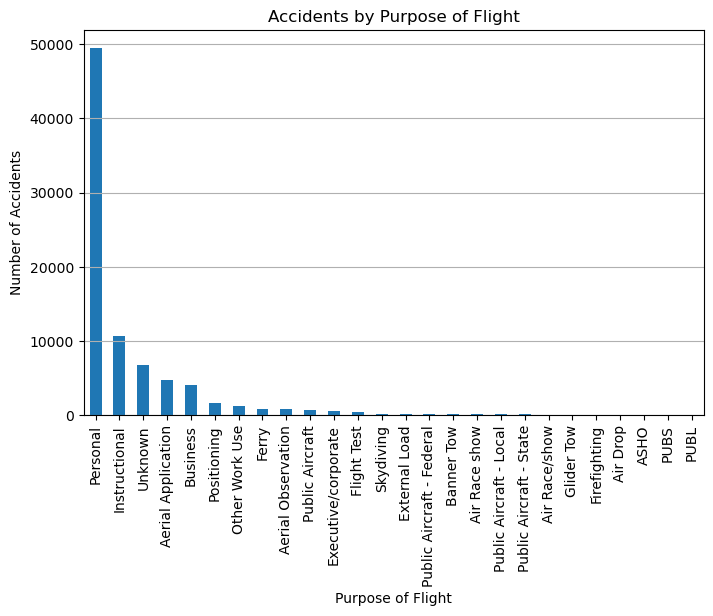

In [44]:
# Count of accidents by purpose of flight
purpose_counts = df_cleaned['Purpose.of.flight'].value_counts()

# Bar chart for purpose of flight
purpose_counts.plot(kind='bar', figsize=(8,5), title='Accidents by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

### Accidents by Purpose of Flight

This chart shows the number of accidents for each flight purpose.  
Personal flights had the most, followed by instructional and business.  
This helps identify high-risk flight categories for the company to consider.

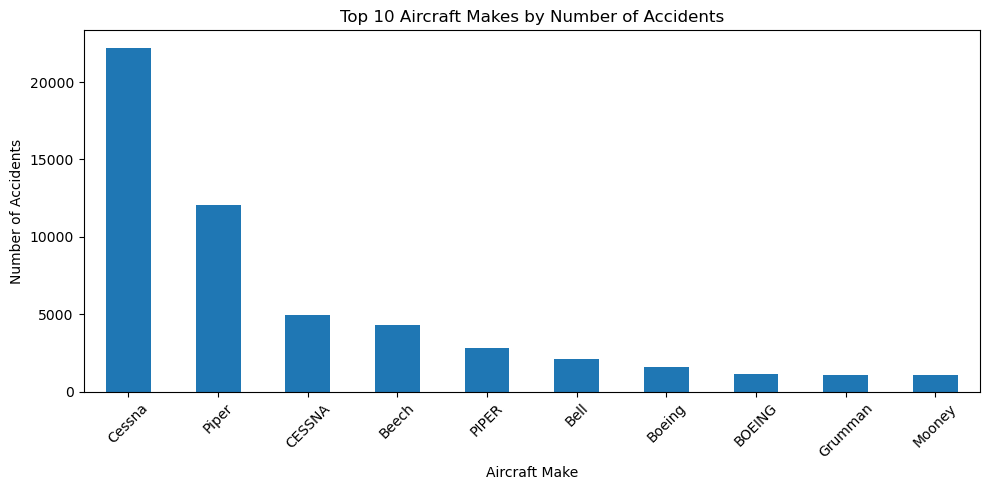

In [46]:
# Top 10 aircraft makes by number of accidents
top_makes = df_cleaned['Make'].value_counts().head(10)

# Plotting
top_makes.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Aircraft Makes by Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Accidents by Aircraft Make

This chart shows the top 10 aircraft manufacturers involved in accidents. 

Understanding which makes appear most frequently in the data helps the company identify models with higher incident rates, which may require extra scrutiny before making purchase decisions.

### Recommendation 1: Accident Trends Over Time
Accidents have decreased steadily over the years, suggesting that modern aircraft and improved regulations have enhanced safety. 
The company should focus on *newer aircraft models* (post-2000) for lower risk.

### Recommendation 2: Flight Purpose
Personal flights account for the highest number of accidents. 
The company should *avoid or minimize private charter/personal flying*, and instead focus on commercial or instructional flights which have lower risk.

### Recommendation 3: Aircraft Make
Cessna and Piper appear most frequently in accident data.
The company should *prioritize thorough inspection and history checks* before purchasing Cessna or Piper models, or consider *alternative manufacturers* with lower incident counts.

###  Summary

The analysis revealed that personal flights and certain aircraft makes (like Cessna and Piper) are most involved in accidents. By focusing on safer flight types and thoroughly assessing commonly used aircraft, the company can reduce risk as it enters the aviation industry.